# Step 01: Setup
- Created virtual environment
- Installed NumPy & Jupyter
- Initialized model with random slope (m) and intercept (c)


In [9]:
import numpy as np

# reproducibility (so random values are same every run)
rng = np.random.default_rng(seed=42)

# our model: y = m*x + c
m = rng.normal()  # slope
c = rng.normal()  # intercept

print("NumPy version:", np.__version__)
print(f"Initial params -> m: {m:.4f}, c: {c:.4f}")


NumPy version: 2.2.6
Initial params -> m: 0.3047, c: -1.0400


# Step 02: Generate Training Data
- Create random input values (X)
- Apply the true function y = 2x + 3 to get outputs (Y)
- This forms our dataset (input → output pairs)


In [10]:
# Create random x values (input)
x = rng.uniform(-10, 10, size=100) # 100 random numbers between -10 and 10

# Function
y = 2 * x + 3

print("First 10 x values:", x[:10])
print("First 10 y values:", y[:10])


First 10 x values: [ 7.1719584   3.94736058 -8.11645304  9.51244703  5.22279404  5.72128611
 -7.43772735 -0.99228124 -2.58403952  8.53529978]
First 10 y values: [ 17.3439168   10.89472116 -13.23290608  22.02489407  13.44558808
  14.44257221 -11.87545469   1.01543752  -2.16807903  20.07059955]


# Step 03: Vizualize Data

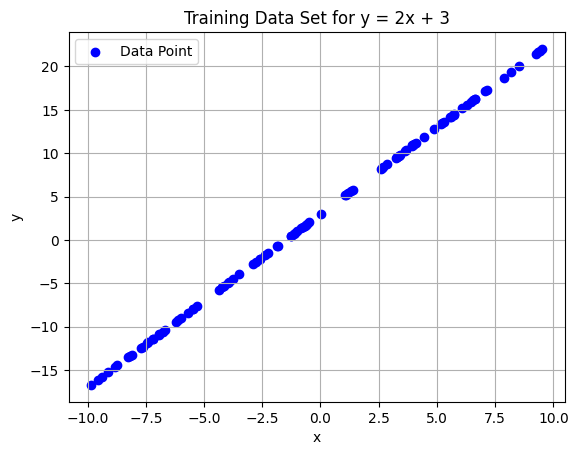

In [12]:
import matplotlib.pyplot as plt

# Plot data
plt.scatter(x, y, color='blue', label='Data Point')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data Set for y = 2x + 3")
plt.legend()
plt.grid(True)
plt.show()


# Step 04: Forwared Pass
- Calculate model predictions (Y_pred) using current parameters (m, c)
- Compare predictions with actual outputs (Y) to measure error

In [13]:
# Model Predection: y_pred = m * x + c
y_pred = m * x + c

print("First 10 predictions:", y_pred[:10])
print(f"Initial Params -> m: {m: .4f}, c: {c: .4f}")

First 10 predictions: [ 1.14543411  0.16284408 -3.51320598  1.85862097  0.55149044  0.70338949
 -3.30638666 -1.34234915 -1.82738508  1.56086752]
Initial Params -> m:  0.3047, c: -1.0400


# Step 05: Compute Loss
- Use Mean Squared Error (MSE) to measure how well model fits data
- MSE = (1/n) * Σ(y_pred - y)^2
- Where:
  - n = number of data points
  - y_pred = model predictions
  - y = actual outputs

In [14]:
mse = np.mean((y_pred - y) ** 2)
print(f"Mean Squared Error with initial parameters: {mse:.4f}")

Mean Squared Error with initial parameters: 100.6477


# Step 06: Gradient Descent
- Calculate gradients of MSE with respect to m and c
- Update parameters using gradient descent rule
- Repeat until convergence

In [15]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000   # number of updates 

# Initialize parameters (start fresh)
m = rng.normal()
c = rng.normal()

# Training Loop 
for i in range(epochs):
    # Forward Pass: Predictions 
    y_pred = m * x + c

    # Compute gradients
    dm = (2 / len(x)) * np.sum((y_pred - y) * x)
    dc = (2 / len(x)) * np.sum(y_pred - y)

    # Update parameters
    m -= learning_rate * dm
    c -= learning_rate * dc

    # Compute loss
    if (i+1) % 100 == 0:
        mse = np.mean((y_pred - y) ** 2)
        print(f"Epoch {i+1}: MSE={mse:.4f}, m={m:.4f}, c={c:.4f}")

# Final parameters
print(f"\nLearned parameters -> m: {m:.4f}, c: {c:.4f}")



Epoch 100: MSE=0.0541, m=1.9985, c=2.7719
Epoch 200: MSE=0.0010, m=1.9998, c=2.9697
Epoch 300: MSE=0.0000, m=2.0000, c=2.9960
Epoch 400: MSE=0.0000, m=2.0000, c=2.9995
Epoch 500: MSE=0.0000, m=2.0000, c=2.9999
Epoch 600: MSE=0.0000, m=2.0000, c=3.0000
Epoch 700: MSE=0.0000, m=2.0000, c=3.0000
Epoch 800: MSE=0.0000, m=2.0000, c=3.0000
Epoch 900: MSE=0.0000, m=2.0000, c=3.0000
Epoch 1000: MSE=0.0000, m=2.0000, c=3.0000

Learned parameters -> m: 2.0000, c: 3.0000


Step 07: Evaluation (plot learned line vs data)


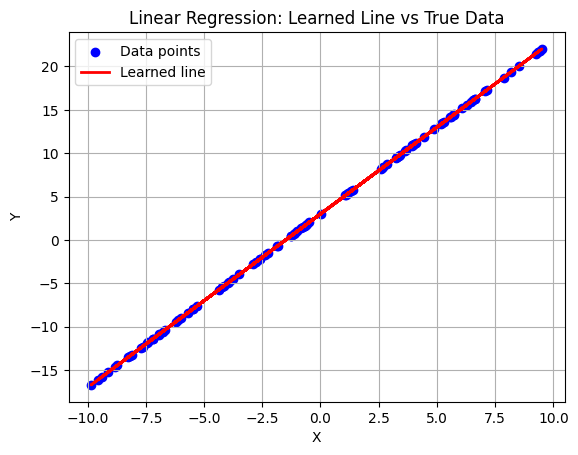

In [17]:


plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Learned line', linewidth=2)
plt.title("Linear Regression: Learned Line vs True Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# Step 08: Inference (predict new data)

In [18]:
# New X values
x_new = np.array([-5, 0, 5, 10])

# Model prediction: y = m*x + c
y_new = m * x_new + c

# Print results
for x_val, y_val in zip(x_new, y_new):
    print(f"Input x = {x_val}, Predicted y = {y_val:.2f}")


Input x = -5, Predicted y = -7.00
Input x = 0, Predicted y = 3.00
Input x = 5, Predicted y = 13.00
Input x = 10, Predicted y = 23.00


# Step 09: Plot predictions 

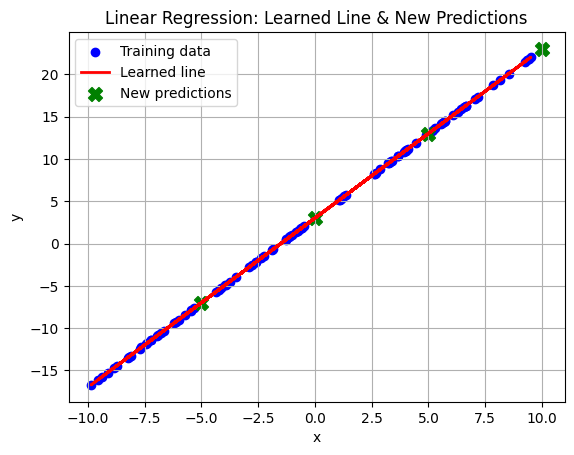

In [19]:
# Plot original training data
plt.scatter(x, y, color='blue', label='Training data')

# Plot learned line
plt.plot(x, m*x + c, color='red', label='Learned line', linewidth=2)

# Plot new predictions
plt.scatter(x_new, y_new, color='green', label='New predictions', s=100, marker='X')

plt.title("Linear Regression: Learned Line & New Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
